In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import DistanceMetric
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline

plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', 100)

/Users/adamszabunio/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
full_data = pd.read_csv("ts_corn_47yr_df.csv")

full_data.fips_code = full_data.fips_code.astype(str).apply(lambda x: x.zfill(5))
full_data.set_index('fips_code', inplace=True)
full_data.columns = full_data.columns.astype(int)
full_data.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,56.0,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,53.8,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8
01077,25.0,42.0,51.4,55.5,40.0,50.0,50.0,36.0,66.4,51.6,40.3,76.7,79.4,52.0,70.0,84.9,70.0,77.9,34.5,79.3,35.9,54.5,104.0,54.7,96.2,95.0,80.0,76.0,61.0,100.0,95.0,128.0,99.0,145.0,135.0,112.0,84.0,92.0,99.0,130.0,126.5,124.8,75.7,154.6,184.4,161.6,106.5
01079,30.0,45.0,52.5,54.4,34.0,42.0,53.0,33.0,30.3,42.6,20.0,69.7,69.6,41.1,67.9,74.5,75.0,65.7,31.1,83.3,44.3,78.6,109.2,65.6,110.9,92.0,82.0,108.0,68.0,136.0,99.0,138.0,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.5,78.6,172.0,187.1,140.3,117.2
01083,33.0,44.0,47.3,49.0,40.0,44.0,68.0,38.0,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,70.2,119.1,66.7,93.9,94.0,90.0,86.0,71.0,112.0,86.0,146.0,107.0,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.3,71.9,159.3,181.7,170.8,112.9
01089,33.0,51.0,56.7,61.1,54.0,75.0,79.0,35.0,61.3,74.9,25.2,55.4,96.0,55.9,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.0,116.7,104.0,93.0,83.0,68.0,121.0,88.0,118.0,102.0,125.0,137.0,143.0,90.0,100.0,153.0,128.0,113.9,147.9,110.6,161.6,169.0,173.2,150.7


In [ ]:
5, 83

In [33]:
full_data.loc["51067"]

1970     48.0
1971     66.0
1972     59.0
1973     66.0
1974     73.0
1975     78.0
1976     55.0
1977     55.0
1978     83.0
1979     83.0
1980     62.0
1981     79.0
1982     88.0
1983     37.5
1984     85.0
1985     99.0
1986     57.0
1987     69.0
1988     84.0
1989     86.0
1990     81.0
1991     83.0
1992     88.0
1993     66.0
1994     98.0
1995     80.0
1996     90.0
1997     81.0
1998     79.0
1999      0.0
2000    120.0
2001    110.0
2002     64.0
2003     94.0
2004    129.0
2005    102.0
2006     91.0
2007     97.0
2008     71.0
2009    112.0
2010     76.9
2011    103.1
2012    113.6
2013    137.2
2014    151.7
2015    149.0
2016    147.5
Name: 51067, dtype: float64

In [25]:
for col in full_data.columns:
    print(full_data[col][full_data[col]==0])

Series([], Name: 1970, dtype: float64)
Series([], Name: 1971, dtype: float64)
Series([], Name: 1972, dtype: float64)
Series([], Name: 1973, dtype: float64)
Series([], Name: 1974, dtype: float64)
Series([], Name: 1975, dtype: float64)
Series([], Name: 1976, dtype: float64)
Series([], Name: 1977, dtype: float64)
Series([], Name: 1978, dtype: float64)
Series([], Name: 1979, dtype: float64)
Series([], Name: 1980, dtype: float64)
Series([], Name: 1981, dtype: float64)
Series([], Name: 1982, dtype: float64)
Series([], Name: 1983, dtype: float64)
Series([], Name: 1984, dtype: float64)
Series([], Name: 1985, dtype: float64)
Series([], Name: 1986, dtype: float64)
Series([], Name: 1987, dtype: float64)
Series([], Name: 1988, dtype: float64)
Series([], Name: 1989, dtype: float64)
Series([], Name: 1990, dtype: float64)
Series([], Name: 1991, dtype: float64)
Series([], Name: 1992, dtype: float64)
Series([], Name: 1993, dtype: float64)
Series([], Name: 1994, dtype: float64)
Series([], Name: 1995, dt

# Linear Regression

Fips Code: 01049


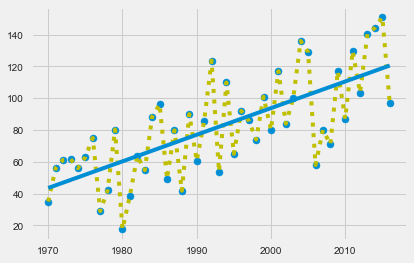

Fips Code: 19087


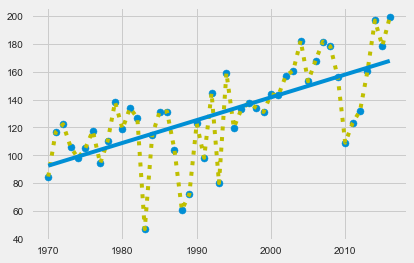

Fips Code: 27147


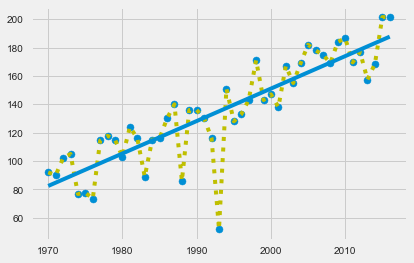

Fips Code: 39099


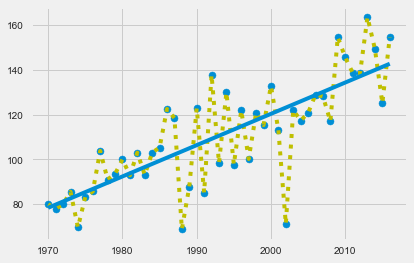

Fips Code: 55109


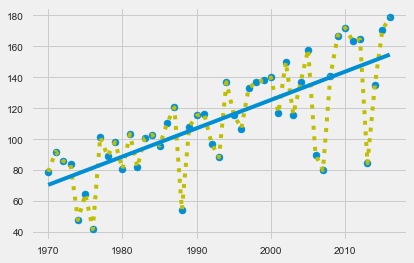

In [3]:
for i in range(0, full_data.shape[0], 200): # Choose 5 Counties from dataset to fit a linear regression  
    print("Fips Code: {}".format(full_data.iloc[i].name))
    X = np.array(full_data.columns).reshape(-1,1)
    y = full_data.iloc[i].values
    lm = LinearRegression()
    lm.fit(X, y)
    preds = lm.predict(X)
    plt.scatter(X, y) # true values
    plt.plot(X, y, 'y:') 
    plt.plot(X, preds) # plot line of best fit
    plt.show();

# Randomly create an array of years to remove from complete dataset

In [4]:
pop_list = np.random.randint(1970,2017, full_data.shape[0])
pop_list[:5]

array([1981, 1988, 1980, 1991, 1983])

/Users/adamszabunio/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


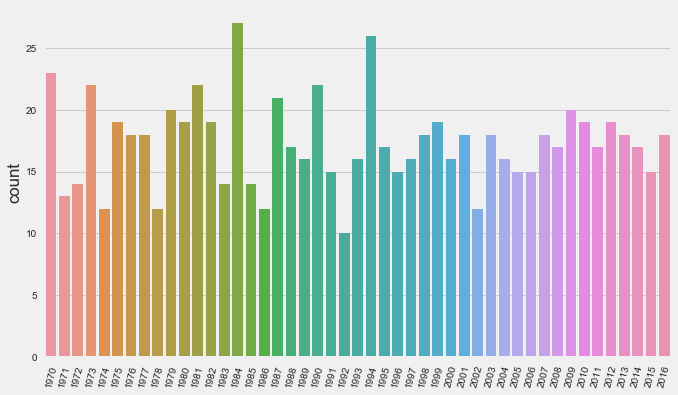

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(rotation=75)
sns.countplot(pop_list); # distribution of randomn draws (count by year) TODO: add x/y labels, titles, and legends to all plots

# Keep track of all the removed data 

In [6]:
true = [full_data.iloc[i][yr] for i, yr in enumerate(pop_list)]
true[:5]

[38.700000000000003, 34.5, 20.0, 70.200000000000003, 55.899999999999999]

In [7]:
full_test = full_data.copy() # make a copy before removing data
for i, yr in enumerate(pop_list):
    full_test.iloc[i][yr] = np.nan 

In [8]:
full_test.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,56.0,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,17.6,NaN,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,53.8,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8
01077,25.0,42.0,51.4,55.5,40.0,50.0,50.0,36.0,66.4,51.6,40.3,76.7,79.4,52.0,70.0,84.9,70.0,77.9,NaN,79.3,35.9,54.5,104.0,54.7,96.2,95.0,80.0,76.0,61.0,100.0,95.0,128.0,99.0,145.0,135.0,112.0,84.0,92.0,99.0,130.0,126.5,124.8,75.7,154.6,184.4,161.6,106.5
01079,30.0,45.0,52.5,54.4,34.0,42.0,53.0,33.0,30.3,42.6,NaN,69.7,69.6,41.1,67.9,74.5,75.0,65.7,31.1,83.3,44.3,78.6,109.2,65.6,110.9,92.0,82.0,108.0,68.0,136.0,99.0,138.0,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.5,78.6,172.0,187.1,140.3,117.2
01083,33.0,44.0,47.3,49.0,40.0,44.0,68.0,38.0,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,NaN,119.1,66.7,93.9,94.0,90.0,86.0,71.0,112.0,86.0,146.0,107.0,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.3,71.9,159.3,181.7,170.8,112.9
01089,33.0,51.0,56.7,61.1,54.0,75.0,79.0,35.0,61.3,74.9,25.2,55.4,96.0,NaN,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.0,116.7,104.0,93.0,83.0,68.0,121.0,88.0,118.0,102.0,125.0,137.0,143.0,90.0,100.0,153.0,128.0,113.9,147.9,110.6,161.6,169.0,173.2,150.7


# Predictions for all missing values

In [9]:
y_pred = []
for i in range(full_data.shape[0]):
    X = full_data.columns.tolist()
    X.remove(pop_list[i])
    X_miss = np.array(X).reshape(-1,1)
    y = full_test.iloc[i].dropna().values
    lm = LinearRegression()
    lm.fit(X_miss, y)
    
    X_full = np.array(full_data.columns).reshape(-1,1)
    preds = lm.predict(X_full)
    y_pred.append(preds[pop_list[i]-1970])

# Spatial Predictions

In [10]:
centroids_df = pd.read_csv("county_centroids.csv", index_col=0)
centroids_df.fips_code = centroids_df.fips_code.astype(str).apply(lambda x: x.zfill(5))
centroids_df.set_index('fips_code', inplace=True)
full_data_centroids = full_data.join(centroids_df) 
full_spatial = full_data_centroids[['latitude', 'longitude']]
full_spatial.head()

,latitude,longitude
fips_code,,
01049,34.459800,-85.804109
01077,34.901407,-87.654010
01079,34.521676,-87.310989
01083,34.810099,-86.981401
01089,34.763090,-86.550226


In [11]:
full_hav_df = full_spatial.copy()
full_hav_df.latitude = full_hav_df.latitude.apply(lambda x : x*np.pi/180)
full_hav_df.longitude = full_hav_df.longitude.apply(lambda x : x*np.pi/180)

dist = DistanceMetric.get_metric("haversine")
hav_dist_df = pd.DataFrame(dist.pairwise(full_hav_df))

hav_dist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813
0,0.000000,0.027646,0.021704,0.017978,0.011953,0.073580,0.072939,0.073648,0.079829,0.500626,0.508854,0.277779,0.249900,0.164157,0.167133,0.163229,0.058206,0.060338,0.053983,0.066709,0.067840,0.062969,0.058253,0.122046,0.118057,0.131565,0.144310,0.114307,0.104556,0.101088,0.088371,0.090626,0.135951,0.098558,0.095005,0.089223,0.091135,0.112216,0.075691,0.121344,0.067028,0.106735,0.124433,0.127541,0.131562,0.134213,0.113227,0.085939,0.102775,0.150523,...,0.176895,0.190688,0.217231,0.199089,0.164291,0.168249,0.158032,0.161184,0.200329,0.193648,0.166204,0.161157,0.152498,0.168787,0.160243,0.184734,0.154769,0.175108,0.144914,0.177189,0.179752,0.154778,0.170748,0.189710,0.170405,0.177817,0.187336,0.177405,0.195244,0.199802,0.211363,0.181722,0.147870,0.167736,0.150059,0.204921,0.204812,0.166246,0.184588,0.164207,0.187325,0.173309,0.148037,0.214866,0.158919,0.153181,0.179795,0.174724,0.183493,0.286060
1,0.027646,0.000000,0.008255,0.009764,0.015996,0.046817,0.045391,0.046407,0.052186,0.472993,0.481217,0.250721,0.222815,0.183426,0.185438,0.183375,0.078058,0.087877,0.073616,0.091323,0.095285,0.080291,0.080617,0.101367,0.098177,0.116365,0.128899,0.095531,0.091743,0.084136,0.069228,0.076739,0.122984,0.085322,0.083387,0.073740,0.074043,0.099719,0.056815,0.103423,0.050592,0.086563,0.111909,0.107567,0.112650,0.117614,0.102056,0.072047,0.082164,0.134847,...,0.166771,0.174305,0.201215,0.183917,0.151199,0.152116,0.144507,0.149291,0.184216,0.178213,0.154907,0.145057,0.138313,0.156440,0.145293,0.169707,0.142522,0.160918,0.134067,0.167808,0.163913,0.139536,0.160907,0.176723,0.157411,0.162801,0.176900,0.166417,0.178692,0.182810,0.194953,0.168928,0.137051,0.152575,0.136967,0.190236,0.188046,0.151981,0.173210,0.153984,0.171449,0.157650,0.136096,0.199594,0.147983,0.141939,0.167931,0.162183,0.169782,0.259667
2,0.021704,0.008255,0.000000,0.006908,0.011708,0.054674,0.052606,0.053988,0.058848,0.479712,0.487908,0.258215,0.230298,0.182217,0.184602,0.181816,0.069805,0.081118,0.065363,0.083370,0.088377,0.072077,0.072449,0.109531,0.106273,0.123924,0.136514,0.103513,0.098830,0.091860,0.077187,0.083938,0.130204,0.092453,0.090207,0.081194,0.081748,0.106784,0.064685,0.111322,0.058031,0.094668,0.119022,0.115682,0.120673,0.125373,0.108887,0.079217,0.090300,0.142509,...,0.173582,0.182105,0.208989,0.191566,0.158497,0.159862,0.151864,0.156386,0.191990,0.185893,0.161908,0.152791,0.145762,0.163624,0.152868,0.177323,0.149664,0.168401,0.140943,0.174483,0.171633,0.147144,0.167655,0.184040,0.164703,0.170408,0.183784,0.173383,0.186516,0.190689,0.202771,0.176204,0.143929,0.160190,0.144240,0.197823,0.195902,0.159463,0.180255,0.160790,0.179182,0.165340,0.143172,0.207269,0.154907,0.148904,0.175051,0.169408,0.177204,0.267464
3,0.017978,0.009764,0.006908,0.000000,0.006235,0.055834,0.054961,0.055737,0.061915,0.482657,0.490888,0.259977,0.232084,0.175641,0.177935,0.175340,0.071225,0.078301,0.066811,0.082945,0.085770,0.074320,0.072967,0.107529,0.103976,0.120271,0.132938,0.100839,0.094540,0.088596,0.074536,0.079845,0.126022,0.088239,0.085630,0.077487,0.078485,0.102446,0.061878,0.108402,0.054445,0.092440,0.114718,0.113441,0.118085,0.122098,0.104271,0.075104,0.088216,0.139013,...,0.168855,0.178850,0.205656,0.187996,0.154386,0.156514,0.147844,0.152004,0.188670,0.182386,0.157407,0.149424,0.141892,0.159351,0.149198,0.173702,0.145351,0.164562,0.136322,0.169614,0.168219,0.143541,0.162867,0.179931,0.160576,0.166777,0.179129,0.168830,0.183312,0.187614,0.199542,0.172044,0.139307,0.156584,0.140109,0.194134,0.192767,0.155631,0.175790,0.156069,0.175785,0.161870,0.138783,0.203738,0.150322,0.144376,0.170685,0.165184,0.173258,0.268572
4,0.011953,0.015996,0.011708,0.

In [12]:
hav_norm = hav_dist_df.copy()
hav_norm = hav_norm.apply(lambda x: x/sum(x), axis=1)
# test to make sure we normalized along the rows (needed for dot product)
ones = np.ones(hav_norm.shape[0])
hav_norms = [sum(hav_norm.iloc[i]) for i in hav_norm.columns.values]
assert(np.allclose(ones, hav_norms))

hav_vals = np.array(hav_norm).dot(np.array(full_data))

hav_preds = [hav_vals[i][pop_list[i]-1970] for i in range(full_test.shape[0])]

In [13]:
# save the years (and indices) of the randomly chosen year for duplication
predictions = pd.DataFrame({"years":pop_list}, index=full_data.index)
predictions["y_true"] = true
predictions["lr_preds"] = y_pred
predictions["hav_preds"] = hav_preds
predictions.head()

,years,y_true,lr_preds,hav_preds
fips_code,,,,
01049,1981,38.7,62.861779,104.424735
01077,1988,34.5,73.904100,80.488408
01079,1980,20.0,54.907691,85.144510
01083,1991,70.2,85.221466,104.479136
01089,1983,55.9,69.203443,79.156336


In [14]:
for i in [.25, .5, 1, 2, 4, 8, 16]:
    hav_exp_smooth = hav_dist_df.copy()
    hav_exp_smooth = hav_exp_smooth.applymap(lambda x: x**-i if x != 0 else 0)
    hav_exp_smooth = hav_exp_smooth.apply(lambda x: x/sum(x), axis=1)
    norms_exp_hav = [sum(hav_exp_smooth.iloc[j]) for j in hav_exp_smooth.columns.values]
    assert(np.allclose(ones, norms_exp_hav))

    hav_exp_smooth_vals = np.array(hav_exp_smooth).dot(np.array(full_data))

    predictions["exp_smooth_preds{}".format(i)]  = [hav_exp_smooth_vals[j][pop_list[j]-1970] for j in range(full_test.shape[0])]

In [15]:
predictions.head()

,years,y_true,lr_preds,hav_preds,exp_smooth_preds0.25,exp_smooth_preds0.5,exp_smooth_preds1,exp_smooth_preds2,exp_smooth_preds4,exp_smooth_preds8,exp_smooth_preds16
fips_code,,,,,,,,,,,
01049,1981,38.7,62.861779,104.424735,101.522531,100.439510,97.441650,87.236589,71.345459,68.793849,68.872395
01077,1988,34.5,73.904100,80.488408,77.997201,77.163002,74.394807,61.391661,45.024297,46.113840,48.446121
01079,1980,20.0,54.907691,85.144510,81.457329,79.765598,74.483739,55.944235,43.562764,45.686835,46.912331
01083,1991,70.2,85.221466,104.479136,100.604914,99.484805,96.496268,87.851914,83.777298,84.839167,84.132133
01089,1983,55.9,69.203443,79.156336,73.394378,71.732059,67.643962,58.514981,57.696877,60.586839,60.994624


In [16]:
def mape(y_pred,y_true):
    y_pred = np.asarray(y_pred)
    y_true = np.asarray(y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
pred_cols = [col for col in predictions.columns if "pred" in col]
MAPE, MAE, R2, RMSE = [], [], [], []

for col in pred_cols:
    MAPE.append(mape(predictions["y_true"], predictions[col]))
    MAE.append(mean_absolute_error(predictions["y_true"], predictions[col]))
    R2.append(r2_score(predictions["y_true"], predictions[col]))
    RMSE.append(np.sqrt(mean_squared_error(predictions["y_true"], predictions[col])))
    
metric_df = pd.DataFrame({"MAPE": MAPE, "MAE":MAE, "RMSE":RMSE, "RSQUARED":R2}, index=pred_cols)
metric_df

,MAE,MAPE,RMSE,RSQUARED
lr_preds,15.222074,14.518707,19.690872,0.719795
hav_preds,22.335808,20.594958,28.145356,0.427521
exp_smooth_preds0.25,19.564839,17.611744,25.014283,0.547809
exp_smooth_preds0.5,18.733910,16.823688,24.070406,0.581290
exp_smooth_preds1,16.602153,14.933807,21.545253,0.664533
exp_smooth_preds2,11.269614,10.437139,14.924706,0.839025
exp_smooth_preds4,8.335986,8.079218,11.456126,0.905153
exp_smooth_preds8,8.672069,8.597082,12.178155,0.892821
exp_smooth_preds16,9.350467,9.316908,13.016563,0.877556


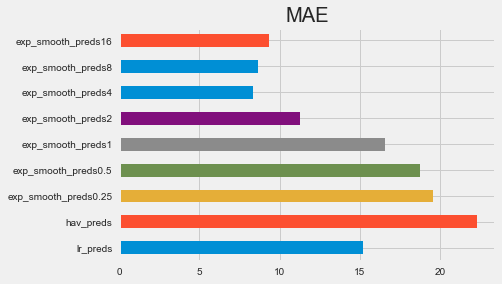

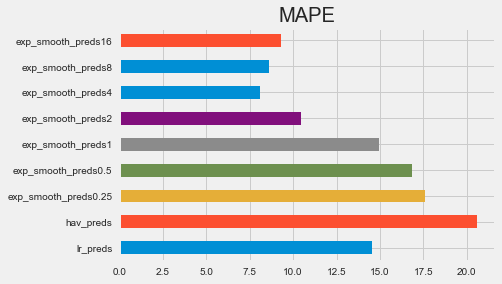

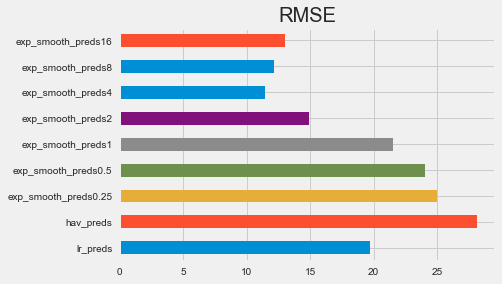

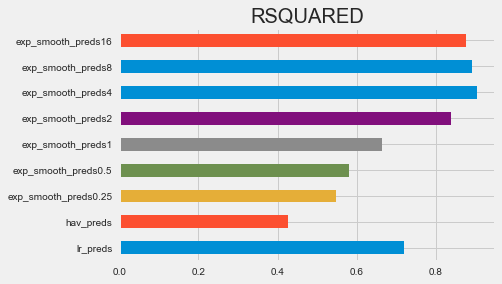

In [18]:
for col in metric_df.columns:
    metric_df[col].plot(kind="barh", title=col)#, rot=45)
    plt.show();

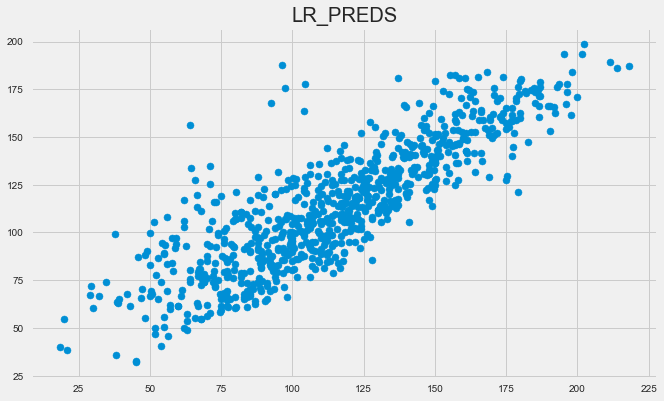

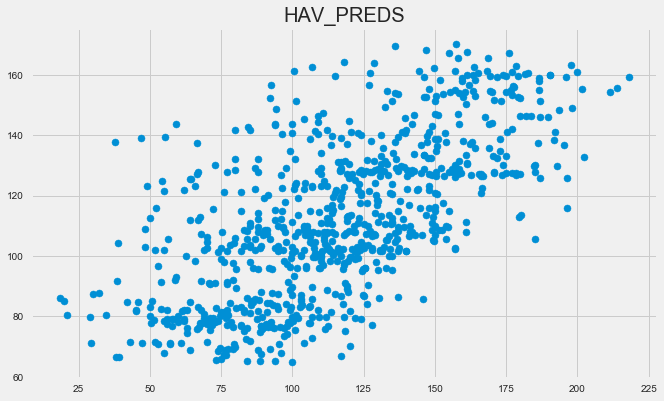

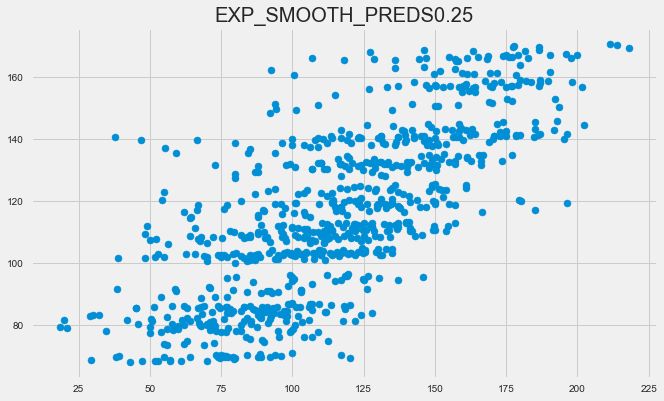

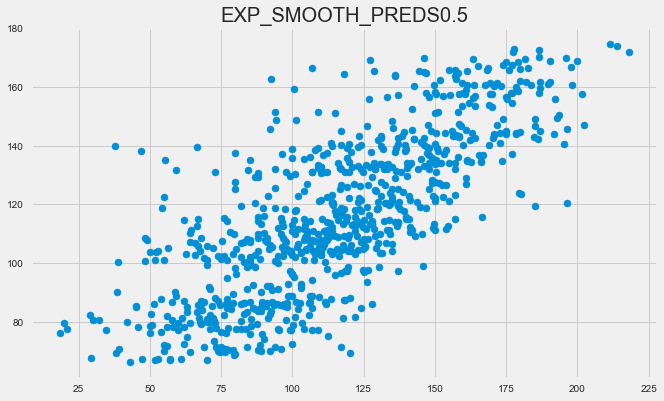

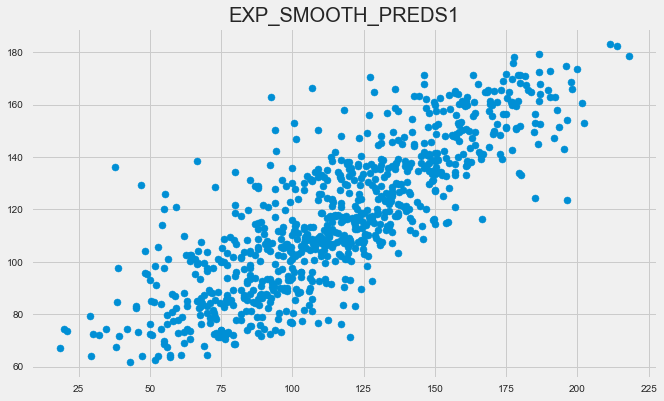

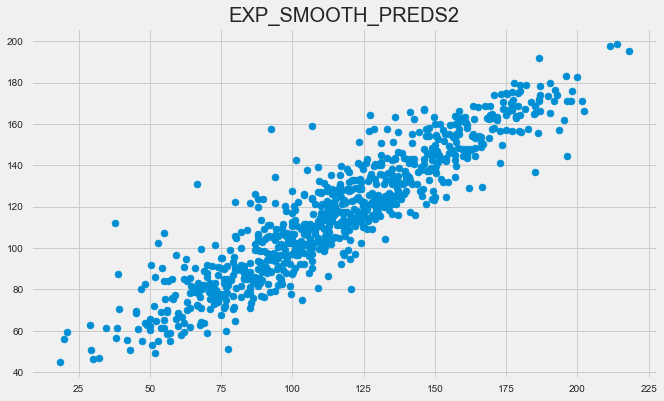

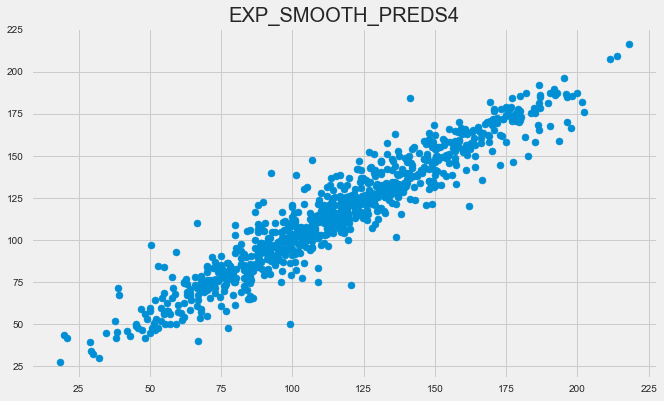

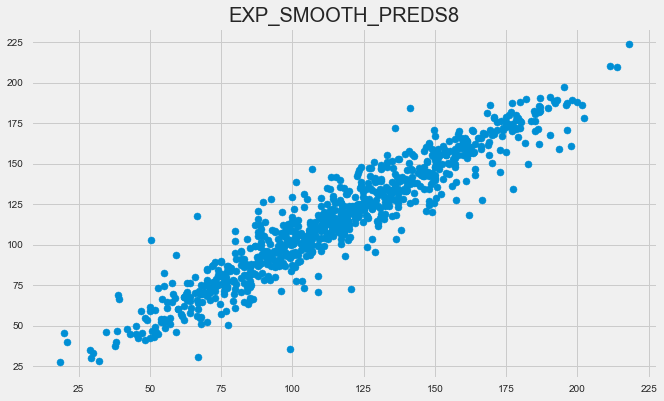

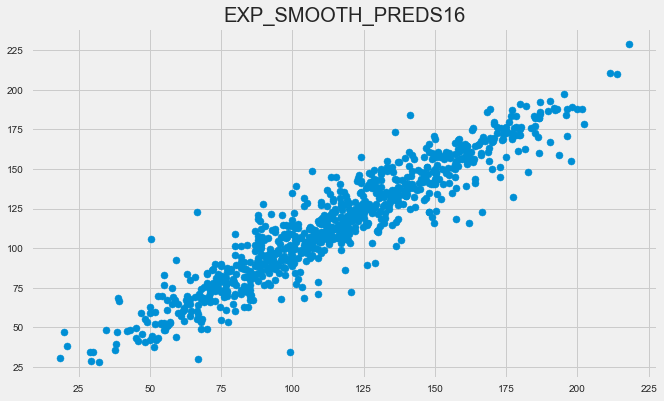

In [19]:
for col in pred_cols: 
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_title(col.upper())
    plt.scatter(predictions["y_true"], predictions[col])
    plt.show();
    print()

In [20]:
from IPython.display import Image
Image(url="http://www.plasenciacigars.com/wp-content/themes/plasencia-cigars-v2/img/hero-hand-with-cigar.png")

NameError: name 'Image' is not defined

# Prediction Accuracy Metrics

In [180]:
mean_absolute_error(true, y_pred), mape(true, y_pred)

(14.764087244768886, 13.870040335955681)

# Save dataframe of results

In [80]:
predictions = pd.DataFrame({"true": true, "pred":y_pred, "years":pop_list}, index=full_data.index)
predictions.head()

,pred,true,years
fips_code,,,
01049,45.754643,61.2,1972
01077,35.202907,42.0,1971
01079,122.763256,73.0,2007
01083,123.767199,100.0,2007
01089,99.199669,93.0,1996


In [83]:
# predictions.to_csv("corn_predicitions.csv")

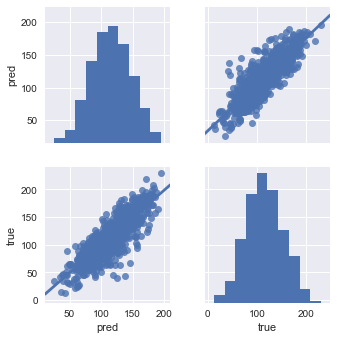

In [81]:
sns.pairplot(predictions[['pred','true']], kind='reg');

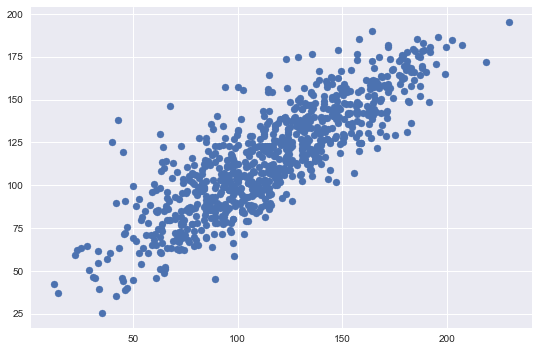

In [82]:
plt.scatter(true, y_pred);

In [91]:
yr_mean_df.interpolate(axis=1)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,56.0,61.2,61.70,56.00,63.0,75.00,29.00,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,53.80,109.90,65.0,92.0,86.0,74.0,101.0,80.0,117.00,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,95.25,103.50,140.50,144.30,151.00,96.8
01077,25.0,42.0,51.4,55.50,40.00,50.0,50.00,36.00,66.4,51.6,40.3,76.7,79.4,52.0,70.0,84.9,70.0,77.9,34.5,79.3,35.9,54.5,104.0,54.70,96.20,95.0,80.0,76.0,61.0,100.0,95.0,128.00,99.0,145.0,135.0,112.0,84.0,92.0,99.0,130.0,126.5,124.80,75.70,130.05,184.40,161.60,106.5
01079,30.0,45.0,52.5,43.25,34.00,42.0,53.00,33.00,30.3,42.6,20.0,69.7,69.6,41.1,67.9,74.5,75.0,65.7,31.1,83.3,44.3,78.6,109.2,65.60,110.90,92.0,82.0,108.0,68.0,136.0,99.0,138.00,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.50,78.60,172.00,187.10,140.30,117.2
01083,33.0,44.0,47.3,49.00,40.00,44.0,68.00,38.00,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,70.2,119.1,66.70,93.90,94.0,90.0,86.0,71.0,112.0,86.0,146.00,107.0,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.30,71.90,159.30,181.70,170.80,170.8
01089,33.0,51.0,56.7,61.10,54.00,75.0,79.00,35.00,61.3,74.9,25.2,55.4,96.0,55.9,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.00,116.70,104.0,93.5,83.0,68.0,121.0,88.0,118.00,102.0,125.0,137.0,143.0,90.0,100.0,153.0,128.0,113.9,147.90,110.60,161.60,169.00,173.20,150.7
05021,51.0,60.0,58.4,47.60,68.00,75.0,82.50,75.80,84.0,70.0,75.5,81.0,114.0,93.0,115.0,135.0,120.0,135.0,125.0,134.0,115.0,111.3,154.2,115.20,144.30,136.0,141.7,133.4,111.4,130.0,130.0,148.00,145.0,156.0,164.0,149.0,173.0,176.0,165.0,163.0,156.0,144.50,182.70,191.90,194.60,180.80,172.9
05031,47.0,42.0,41.4,42.60,40.60,51.4,62.40,58.00,64.0,65.0,24.0,81.0,86.0,72.0,100.0,140.0,88.0,130.0,130.0,129.0,88.0,114.7,140.4,70.20,132.10,126.0,132.0,129.1,86.0,102.0,130.0,130.00,123.0,154.0,160.0,136.0,145.0,184.0,170.0,168.0,169.6,147.30,191.10,189.30,183.80,179.90,179.9
05055,42.0,38.0,36.0,41.00,47.10,62.5,65.10,63.00,70.0,73.0,24.0,74.0,80.0,70.0,92.0,120.0,105.0,115.0,110.0,122.0,87.0,120.0,125.0,73.30,127.00,124.0,126.4,107.7,110.4,124.0,125.0,140.00,125.0,139.0,147.0,124.0,145.0,172.0,153.0,149.0,159.0,110.30,144.60,176.00,182.50,175.20,175.2
05067,47.0,44.0,41.7,37.10,32.50,55.1,76.00,66.00,88.0,64.0,24.0,63.0,104.0,92.0,105.0,110.0,105.0,115.0,105.0,119.0,92.0,103.4,159.4,96.60,129.80,119.0,120.0,109.1,110.4,158.0,140.0,157.00,147.0,140.0,151.0,130.0,156.0,149.0,150.0,153.0,150.0,147.40,166.90,174.70,173.00,168.90,147.3


# Python Time Series

In [64]:
X = full_data.columns.tolist()
X.remove(pop_list[i])

(814, 47)

In [65]:
y_pred = []
for i in range(full_data.shape[0]):
    X = full_data.columns.tolist()
    X.remove(pop_list[i])
    X_miss = np.array(X).reshape(-1,1)
    y = full_test.ix[i].dropna().values
    lm = LinearRegression()
    lm.fit(X_miss, y)
    
    X_full = np.array(full_data.columns).reshape(-1,1)
    preds = lm.predict(X_full)
    y_pred.append(preds[pop_list[i]-1970])

NameError: name 'pop_list' is not defined

In [47]:
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [48]:
rng = pd.date_range('1/1/1970', periods=47, freq='Y')
y = pd.DataFrame({'yields':full_data.iloc[0].values},index=rng)
print("Time Series analysis for fips code: {}".format(full_data.iloc[0].name))
y.head(3)

Time Series analysis for fips code: 01049


,yields
1970-12-31,35.0
1971-12-31,56.0
1972-12-31,61.2


ARIMA (Autoregressive Integrated Moving Average) is a major tool used in time series analysis to attempt to forecast future values of a variable based on its present value.
- The purpose of ARIMA is to determine the nature of the relationship between our residuals, which would provide our model with a certain degree of forecasting power. In the first instance, in order to conduct a time series analysis we must express our dataset in terms of logarithms. If our data is expressed solely in price terms, then this does not allow for continuous compounding of returns over time and will give misleading results.
- An autoregressive process is when a time series follows a particular pattern in that its present value is in some way correlated to its past value(s). For instance, if we are able to use regression analysis to discern the present value of a variable from using its past value, then we refer to this as an AR(1) process:

Xt = ß0 + ß1X(t-1) + et

- However, there are some instances in which the present value of a variable can be determined from the past two or three values, which would incorporate an AR(2) or AR(3) process respectively:

Xt = ß0 + ß1X(t-1) + ß2X(t-2) + et
Xt = ß0 + ß1X(t-1) + ß2X(t-2) + ß3X(t-3) + et

- Note that in an ideal situation, ARIMAX would be employed which forecasts an ARIMA model by also taking explanatory variables into account. However, in situations where we wish to forecast a time series based on its past values alone, then ARIMA is a standard model for doing so.

In [49]:
lnprice=np.log(y)
lnprice

,yields
1970-12-31,3.555348
1971-12-31,4.025352
1972-12-31,4.114147
1973-12-31,4.122284
1974-12-31,4.025352
1975-12-31,4.143135
1976-12-31,4.317488
1977-12-31,3.367296
1978-12-31,3.740048
1979-12-31,4.385770


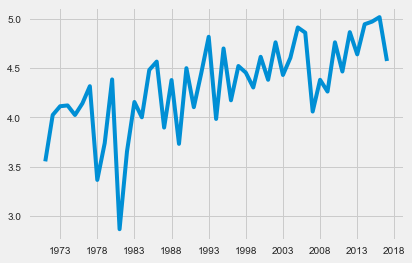

In [50]:
plt.plot(lnprice);

In [55]:
acf_1 =  acf(lnprice)[1:20]
#plt.plot(acf_1.d);
lnprice.diff()[1:]

,yields
1970-12-31,3.555348
1971-12-31,4.025352
1972-12-31,4.114147
1973-12-31,4.122284
1974-12-31,4.025352
1975-12-31,4.143135
1976-12-31,4.317488
1977-12-31,3.367296
1978-12-31,3.740048
1979-12-31,4.385770


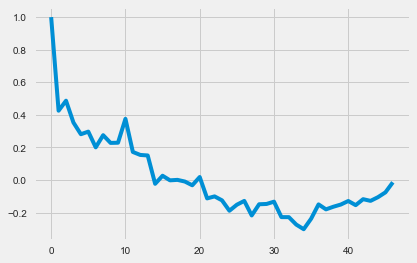

In [56]:
acf_1 = acf(y, nlags=y.shape[0])
plt.plot(acf_1);

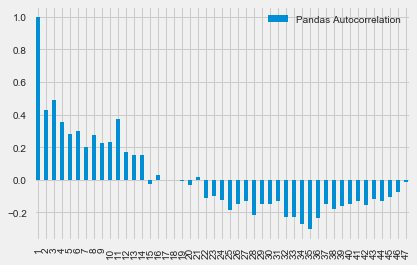

In [57]:
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar');

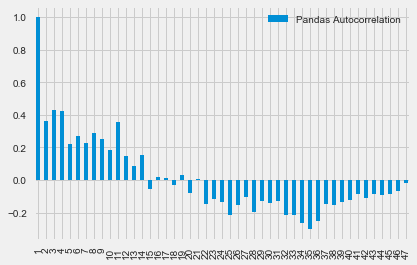

In [67]:
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar');

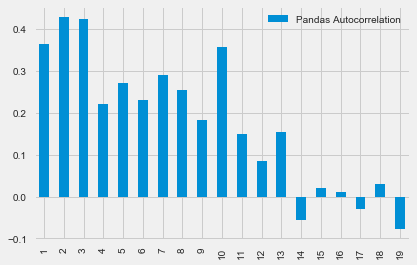

In [17]:
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar');

/Users/adamszabunio/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1127: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


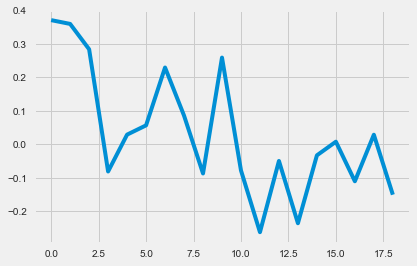

In [14]:
pacf_1 =  pacf(lnprice)[1:20]
plt.plot(pacf_1)

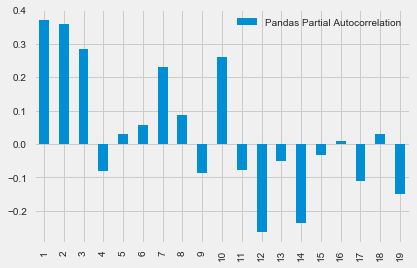

In [18]:
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar');

In [23]:
result = ts.adfuller(lnprice.yields.values, 1)
result

(-2.5003734815460348,
 0.11538347911056457,
 1,
 45,
 {'1%': -3.5848288532235939,
  '10%': -2.6023438271604937,
  '5%': -2.9282991495198907},
 45.171869493950155)

In [69]:
lnprice_diff=lnprice-lnprice.shift()
diff=lnprice_diff.dropna()
test_df = pd.DataFrame(acf(diff, nlags=46))
test_df

,0
0,1.000000
1,-0.564652
2,0.063924
3,0.164759
4,-0.211999
5,0.077081
6,-0.064054
7,0.005119
8,0.063957
9,-0.161134


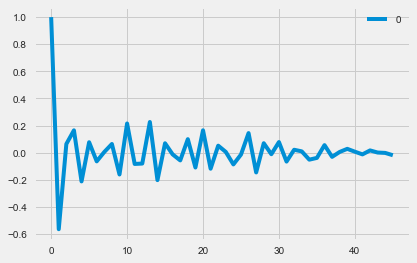

In [70]:
test_df.plot();

/Users/adamszabunio/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1127: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/Users/adamszabunio/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1119: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k]*X[k:]).sum() / denom(k)


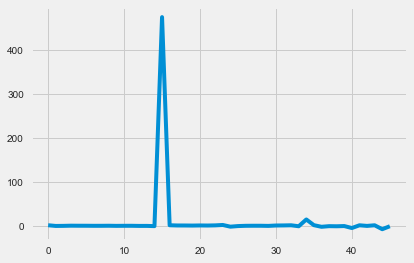

In [71]:
test_df.columns = ['First Difference Autocorrelation']
pacf_1_diff = pacf(diff, nlags=46)
plt.plot(pacf_1_diff);

In [60]:
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.head()
test_df.plot(kind='bar')
pacf_1_diff = pacf(diff)[1:20]
plt.plot(pacf_1_diff);

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

In [61]:
price_matrix=lnprice.as_matrix()
model = ARIMA(price_matrix, order=(0,1,0))
model_fit = model.fit(disp=0)
model_fit.summary()

IndexError: list index out of range

In [63]:
predictions=model_fit.predict(122, 127, typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted.shape

(81,)

In [86]:
y.T

,1970-12-31 00:00:00,1971-12-31 00:00:00,1972-12-31 00:00:00,1973-12-31 00:00:00,1974-12-31 00:00:00,1975-12-31 00:00:00,1976-12-31 00:00:00,1977-12-31 00:00:00,1978-12-31 00:00:00,1979-12-31 00:00:00,1980-12-31 00:00:00,1981-12-31 00:00:00,1982-12-31 00:00:00,1983-12-31 00:00:00,1984-12-31 00:00:00,1985-12-31 00:00:00,1986-12-31 00:00:00,1987-12-31 00:00:00,1988-12-31 00:00:00,1989-12-31 00:00:00,1990-12-31 00:00:00,1991-12-31 00:00:00,1992-12-31 00:00:00,1993-12-31 00:00:00,1994-12-31 00:00:00,1995-12-31 00:00:00,1996-12-31 00:00:00,1997-12-31 00:00:00,1998-12-31 00:00:00,1999-12-31 00:00:00,2000-12-31 00:00:00,2001-12-31 00:00:00,2002-12-31 00:00:00,2003-12-31 00:00:00,2004-12-31 00:00:00,2005-12-31 00:00:00,2006-12-31 00:00:00,2007-12-31 00:00:00,2008-12-31 00:00:00,2009-12-31 00:00:00,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00
yields,35.0,56.0,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,53.8,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8


In [91]:
model = ARIMA(acf(diff), order=(0,1,0))
model_fit = model.fit(disp=0)
model_fit.summary()

IndexError: list index out of range

In [89]:
lnprice_diff=y-y.shift()
diff=lnprice_diff.dropna()
acf(diff)

array([ 1.        , -0.57892462,  0.18255324, -0.05736459, -0.075983  ,
        0.0993507 , -0.1335064 ,  0.05883026, -0.02045943, -0.10126387,
        0.26768655, -0.17257866,  0.00465077,  0.15608202, -0.16926695,
        0.06742531, -0.06141729,  0.03232178, -0.01642696, -0.02767526,
        0.13610878, -0.10082124,  0.0545902 , -0.0119119 , -0.06223389,
       -0.01877299,  0.13394812, -0.1585469 ,  0.06345911,  0.00205716,
        0.0886512 , -0.06654645,  0.01264805,  0.00795975, -0.05391939,
       -0.01938552,  0.04954753, -0.04163519,  0.00454848,  0.03864186,
        0.00187307])

In [90]:
len(acf(diff))

41

In [45]:
import statsmodels.tsa.api as smt

In [ ]:
smt.graphics.plot_acf()

### Seasonal Time Series Analysis of One county 

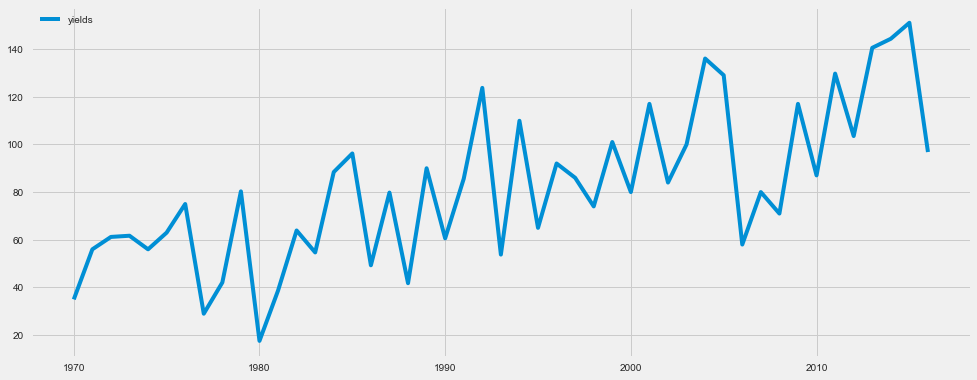

In [72]:
y.plot(figsize=(15, 6))
plt.show();

In [73]:
p = d = q = range(0, 2)
p, d, q

(range(0, 2), range(0, 2), range(0, 2))

In [74]:
pdq = list(itertools.product(p, d, q))

In [76]:
seasonal_pdq = [(x[0], x[1], x[2], 15) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 15)
SARIMAX: (0, 0, 1) x (0, 1, 0, 15)
SARIMAX: (0, 1, 0) x (0, 1, 1, 15)
SARIMAX: (0, 1, 0) x (1, 0, 0, 15)


In [77]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 15) - AIC:1328.3558461824018
ARIMA(0, 0, 0)x(1, 0, 0, 15) - AIC:325.9126053928529
ARIMA(0, 0, 0)x(1, 0, 1, 15) - AIC:308.9313426312319
ARIMA(0, 0, 0)x(1, 1, 0, 15) - AIC:180.32534505360223
ARIMA(0, 0, 1)x(0, 0, 0, 15) - AIC:503.25109305749487
ARIMA(0, 0, 1)x(0, 0, 1, 15) - AIC:2745.936634430418
ARIMA(0, 0, 1)x(0, 1, 0, 15) - AIC:309.33263247880495
ARIMA(0, 0, 1)x(1, 0, 0, 15) - AIC:327.8827145706647
ARIMA(0, 0, 1)x(1, 0, 1, 15) - AIC:302.27394108195716
ARIMA(0, 0, 1)x(1, 1, 0, 15) - AIC:179.0574967588165
ARIMA(0, 1, 0)x(0, 0, 1, 15) - AIC:nan
ARIMA(0, 1, 0)x(1, 0, 0, 15) - AIC:314.8936709424812
ARIMA(0, 1, 0)x(1, 0, 1, 15) - AIC:nan
ARIMA(0, 1, 0)x(1, 1, 0, 15) - AIC:164.3697698054187
ARIMA(0, 1, 1)x(0, 0, 0, 15) - AIC:415.5517868593641
ARIMA(0, 1, 1)x(0, 0, 1, 15) - AIC:1383.3519585725533
ARIMA(0, 1, 1)x(0, 1, 0, 15) - AIC:291.2027604759863
ARIMA(0, 1, 1)x(1, 0, 0, 15) - AIC:299.33373482828307
ARIMA(0, 1, 1)x(1, 0, 1, 15) - AIC:282.16503126532285
ARIMA(0, 1, 1

In [78]:
# ARIMA(0, 1, 1)x(0, 1, 1, 1)

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 15),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0360      0.575      0.063      0.950      -1.091       1.163
ma.L1         -1.0000   1386.787     -0.001      0.999   -2719.053    2717.053
ar.S.L15      -0.7759      0.474     -1.637      0.102      -1.705       0.153
sigma2       671.4299   9.31e+05      0.001      0.999   -1.82e+06    1.83e+06


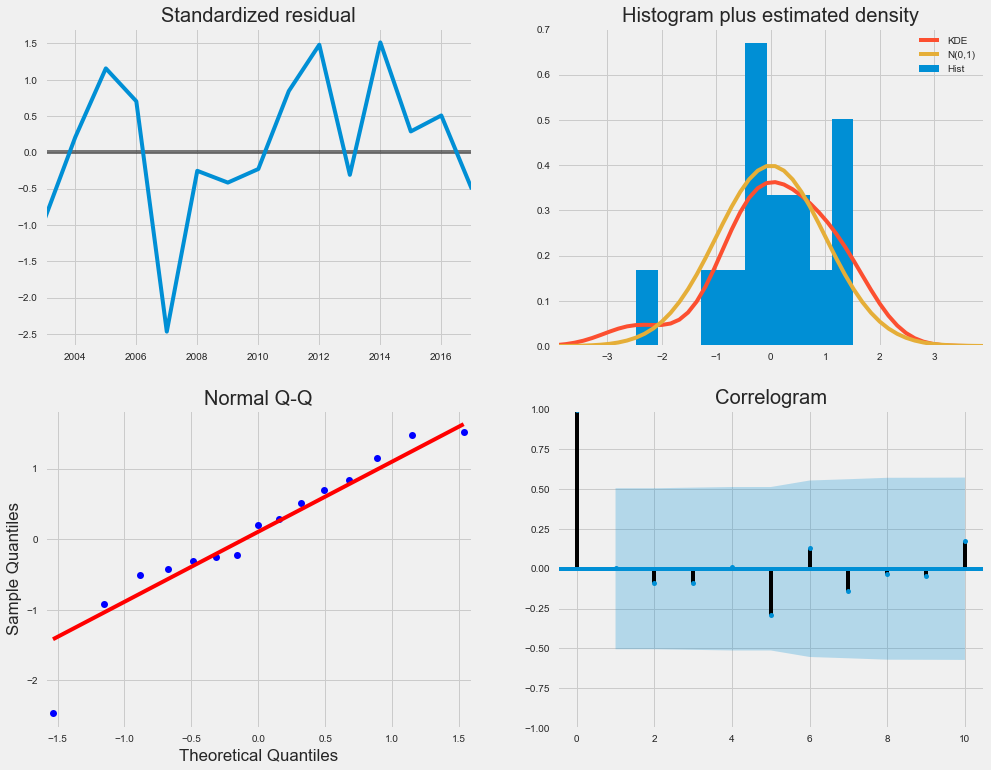

In [79]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [80]:
pred = results.get_prediction(start=pd.to_datetime('2000-12-31'), dynamic=False)
pred_ci = pred.conf_int()

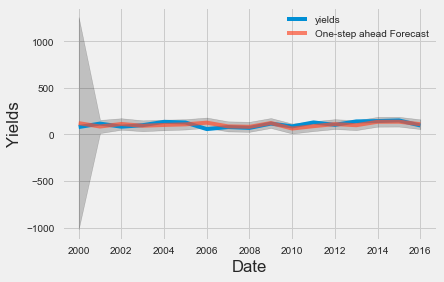

In [81]:
ax = y['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Yields')
plt.legend()

plt.show();

In [82]:
y_forecasted = pred.predicted_mean
y_truth = y['2000-12-31':]['yields']

print('The RMSE of our forecasts is {:.2f}'.format(np.sqrt(mean_squared_error(y_forecasted, y_truth))))

The RMSE of our forecasts is 29.08


In [83]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2000-12-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

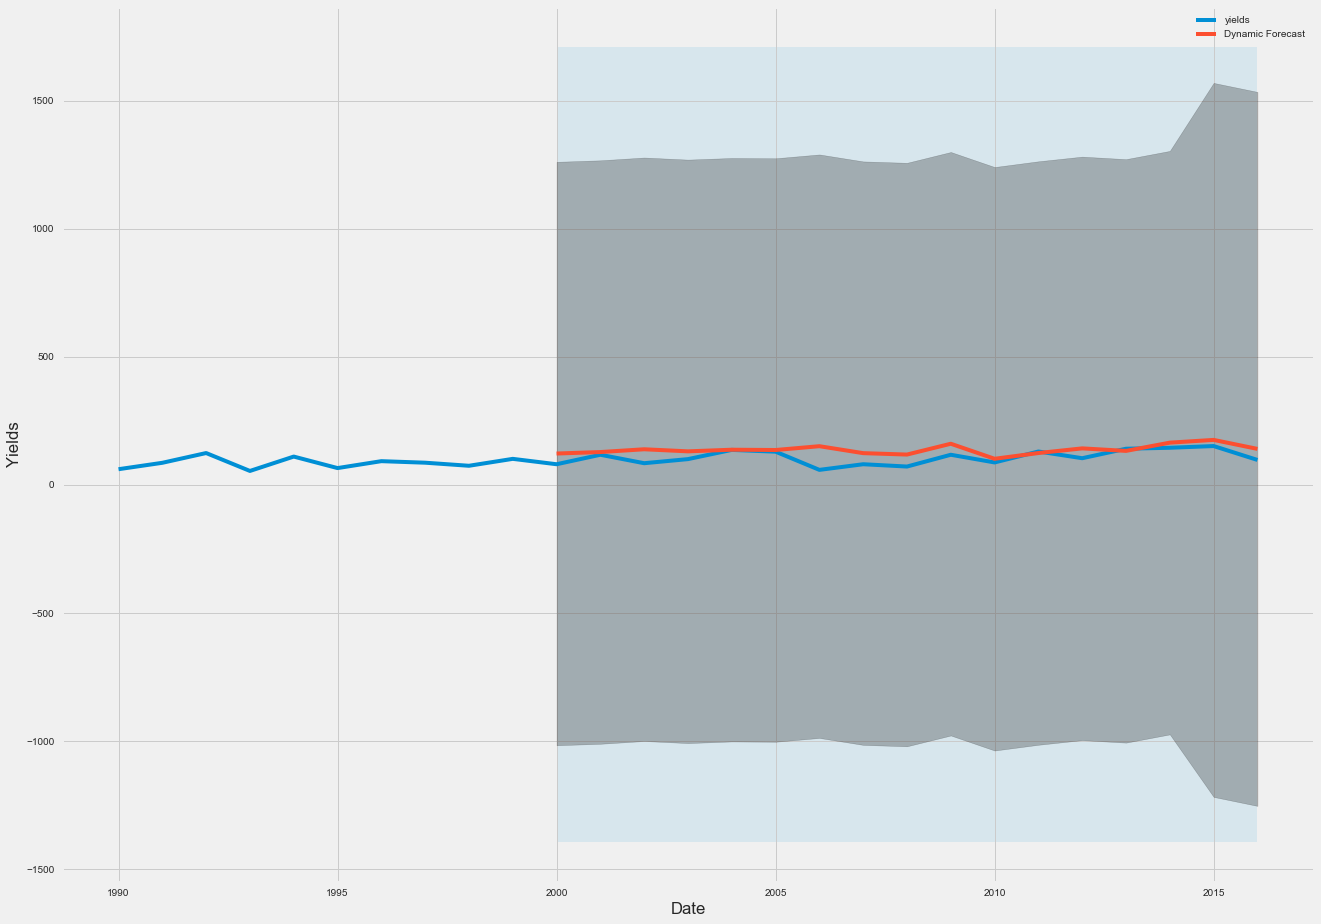

In [84]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2000-12-31'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Yields')

plt.legend()
plt.show()

In [85]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2000-12-31':]['yields']

print('The RMSE of our forecasts is {:.2f}'.format(np.sqrt(mean_squared_error(y_forecasted, y_truth))))

The RMSE of our forecasts is 38.24


In [86]:
# Get forecast 5 steps ahead in future
pred_uc = results.get_forecast(steps=5)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

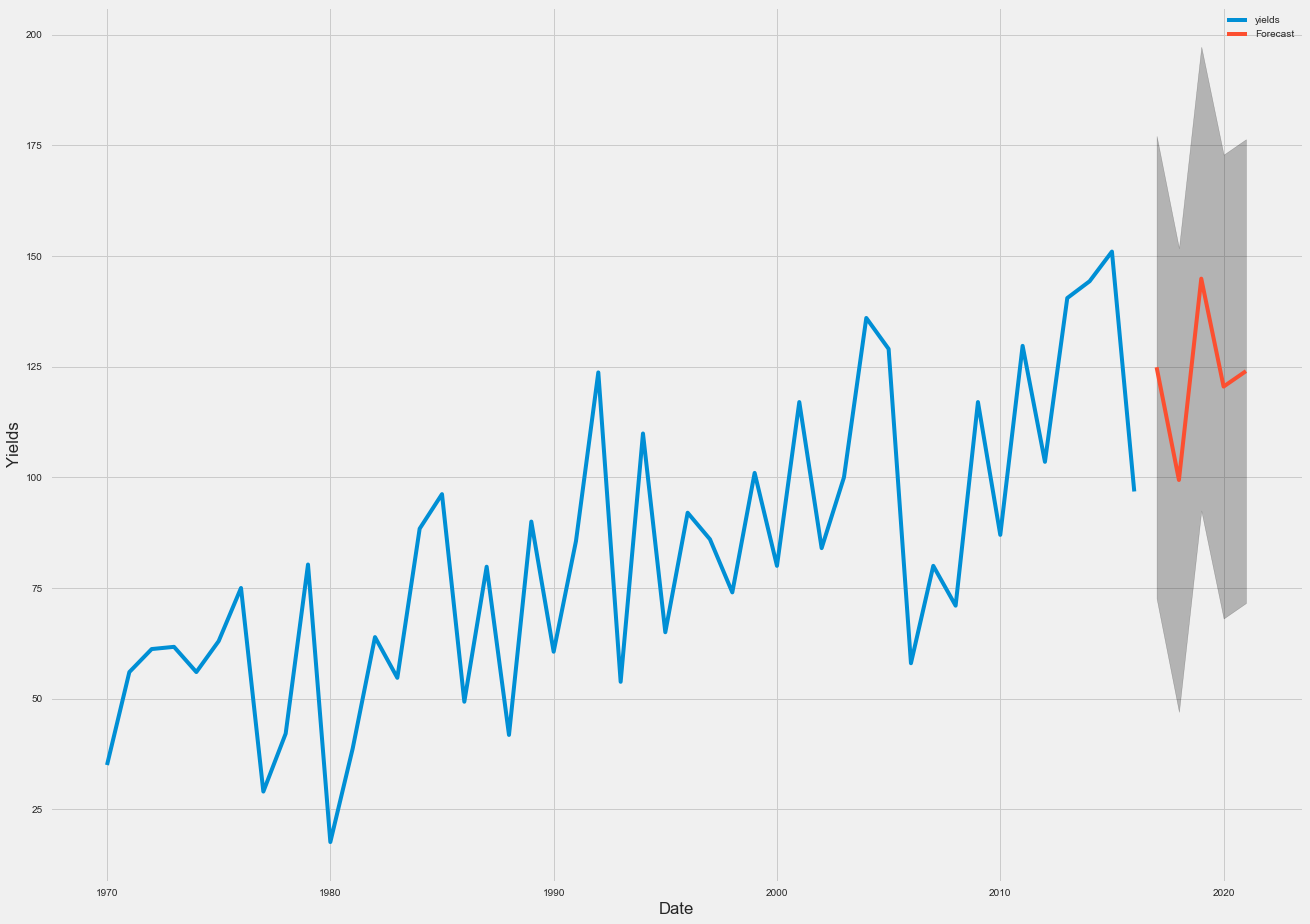

In [87]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Yields')

plt.legend()
plt.show();

# Heatmap of all complete data

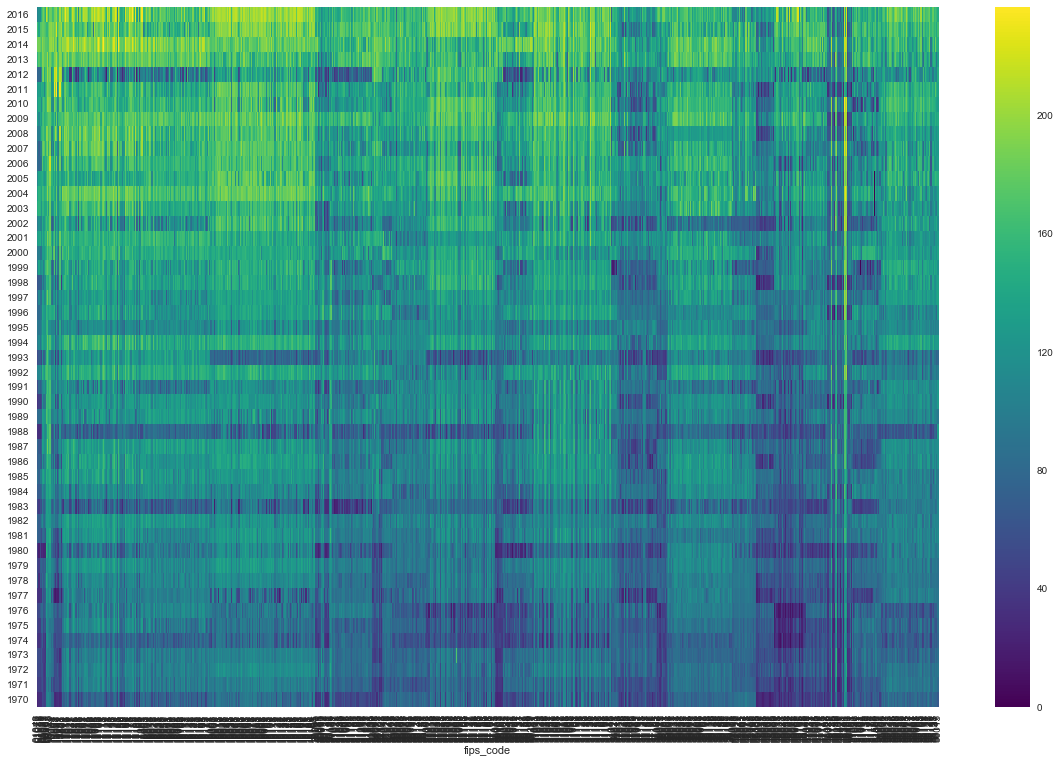

In [48]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(18, 12))

sns.heatmap(full_data.T.reindex(index=full_data.T.index[::-1]),cmap="viridis");

# Time Series for Mean values of complete data

In [65]:
rng = pd.date_range('1/1/1970', periods=47, freq='Y')
y = pd.DataFrame({'yields':full_data.mean().values},index=rng)
print("Time Series analysis for mean value")
y.head(3)

Time Series analysis for mean value


,yields
1970-12-31,69.229730
1971-12-31,80.938821
1972-12-31,89.750491


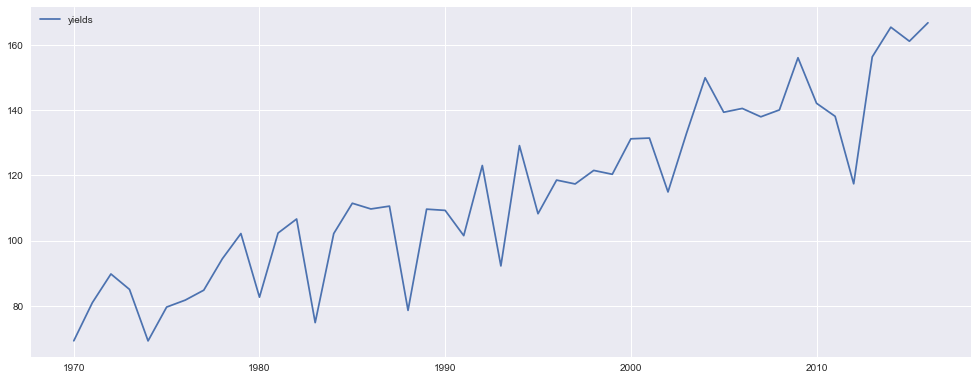

In [66]:
y.plot(figsize=(15, 6))
plt.show();

In [67]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 1) - AIC:510.01197309352796
ARIMA(0, 0, 0)x(0, 1, 1, 1) - AIC:359.22290305084533
ARIMA(0, 0, 0)x(1, 0, 0, 1) - AIC:392.1012973770224
ARIMA(0, 0, 0)x(1, 0, 1, 1) - AIC:352.80697581224905
ARIMA(0, 0, 0)x(1, 1, 0, 1) - AIC:372.73704523649803
ARIMA(0, 0, 0)x(1, 1, 1, 1) - AIC:360.6914684345279
ARIMA(0, 0, 1)x(0, 0, 0, 1) - AIC:510.01197309352796
ARIMA(0, 0, 1)x(0, 0, 1, 1) - AIC:481.4579086410057
ARIMA(0, 0, 1)x(0, 1, 0, 1) - AIC:359.22290305084533
ARIMA(0, 0, 1)x(0, 1, 1, 1) - AIC:353.8031688530033
ARIMA(0, 0, 1)x(1, 0, 0, 1) - AIC:352.8069859525291
ARIMA(0, 0, 1)x(1, 0, 1, 1) - AIC:346.97762865940905
ARIMA(0, 0, 1)x(1, 1, 0, 1) - AIC:360.6914685061876
ARIMA(0, 0, 1)x(1, 1, 1, 1) - AIC:355.68956120993647
ARIMA(0, 1, 0)x(0, 0, 1, 1) - AIC:359.22290305084533
ARIMA(0, 1, 0)x(0, 1, 1, 1) - AIC:371.3112662609715
ARIMA(0, 1, 0)x(1, 0, 0, 1) - AIC:372.73704523649803
ARIMA(0, 1, 0)x(1, 0, 1, 1) - AIC:360.6914684345279
ARIMA(0, 1, 0)x(1, 1, 0, 1) - AIC:399.42438517642887
A

In [68]:
# ARIMA(0, 1, 1)x(0, 1, 1, 1)

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   1166.720     -0.001      0.999   -2287.730    2285.730
ma.S.L1       -1.0000   1167.085     -0.001      0.999   -2288.444    2286.444
sigma2       127.1818   2.97e+05      0.000      1.000   -5.82e+05    5.82e+05


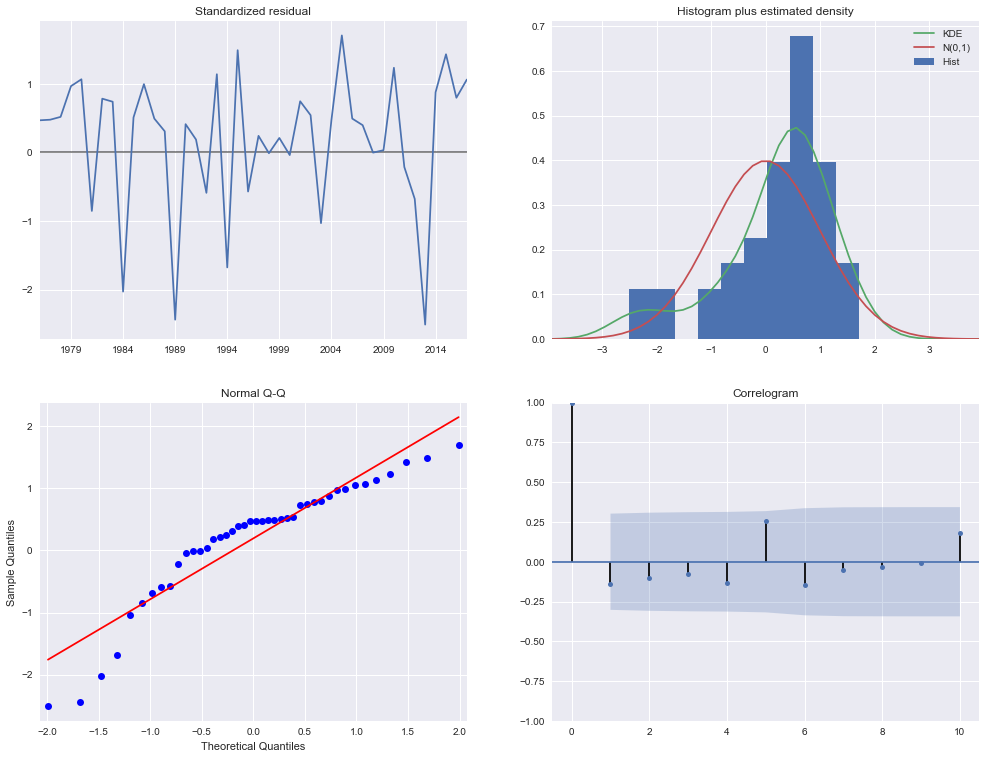

In [69]:
results.plot_diagnostics(figsize=(15, 12))
plt.show();

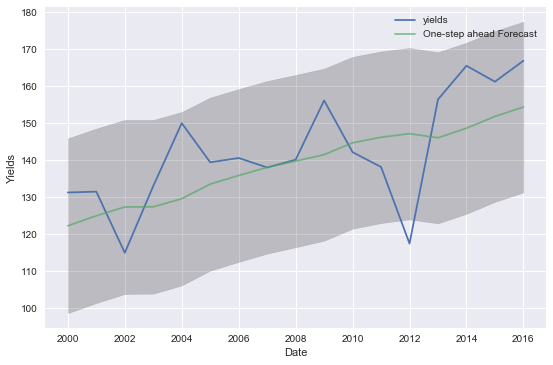

In [70]:
pred = results.get_prediction(start=pd.to_datetime('2000-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Yields')
plt.legend()

plt.show();

In [71]:
y_forecasted = pred.predicted_mean
y_truth = y['2000-12-31':]['yields']

print('The RMSE of our forecasts is {:.2f}'.format(np.sqrt(mean_squared_error(y_forecasted, y_truth))))

The RMSE of our forecasts is 12.34


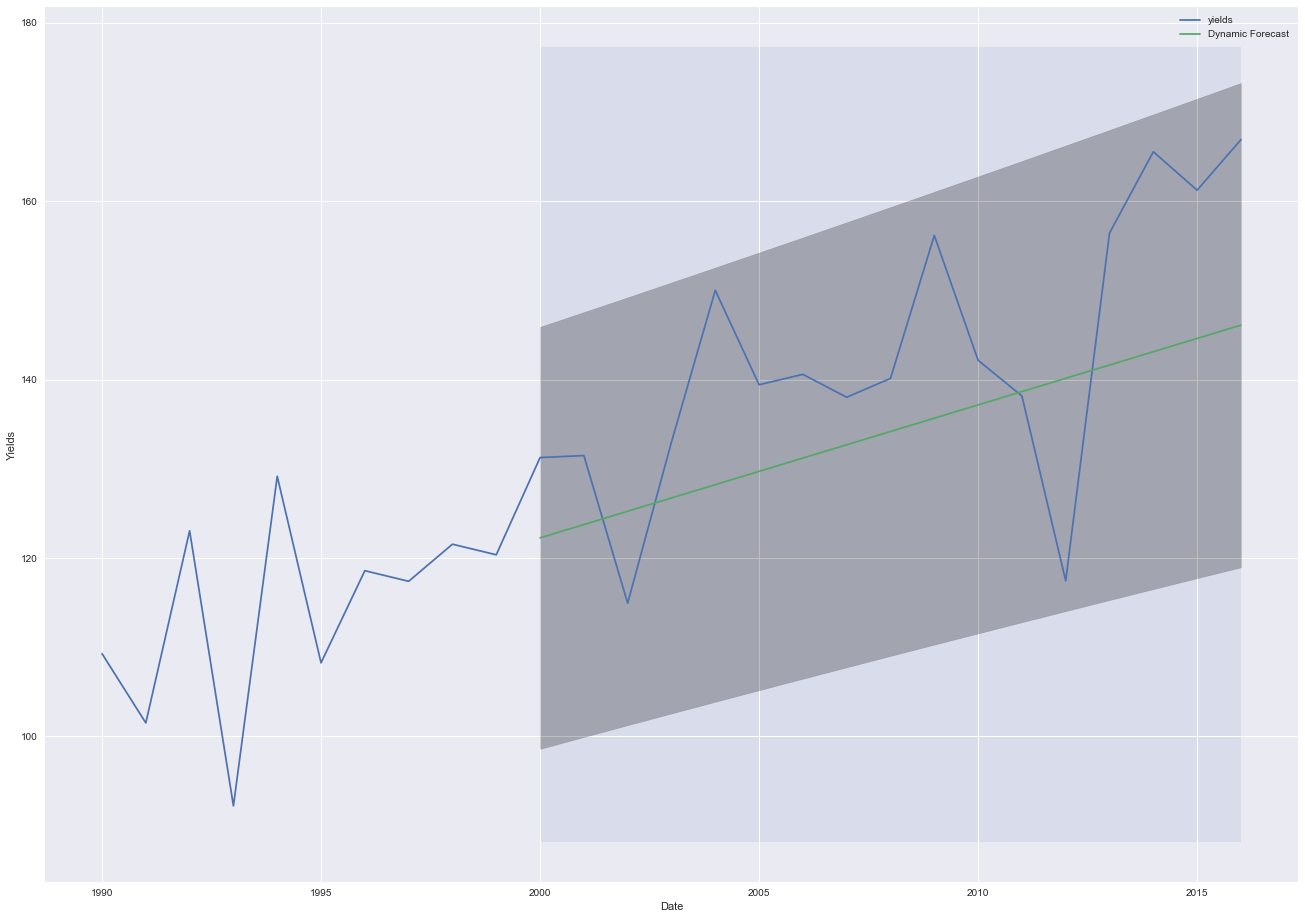

In [72]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2000-12-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2000-12-31'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Yields')

plt.legend()
plt.show();

In [73]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2000-12-31':]['yields']

print('The RMSE of our forecasts is {:.2f}'.format(np.sqrt(mean_squared_error(y_forecasted, y_truth))))

The RMSE of our forecasts is 14.13


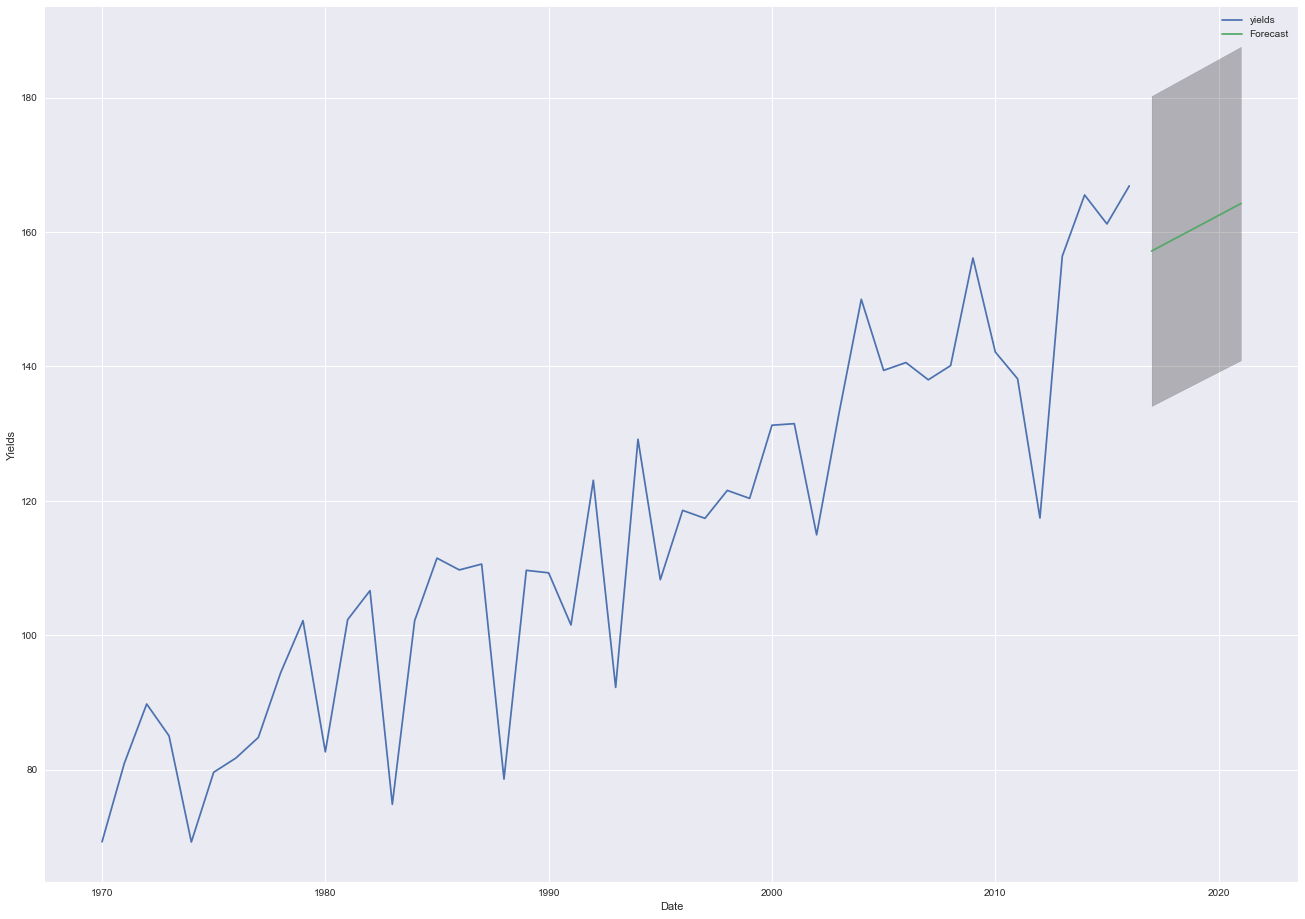

In [74]:
# Get forecast 5 steps ahead in future
pred_uc = results.get_forecast(steps=5)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Yields')

plt.legend()
plt.show();

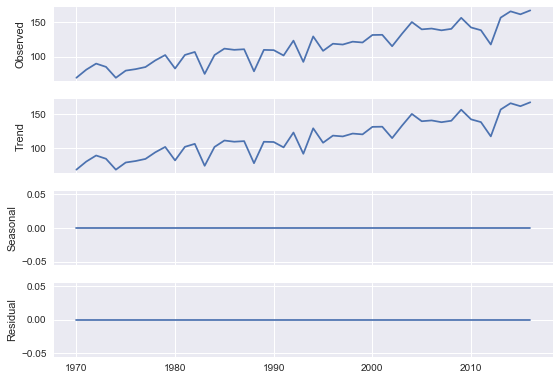

In [85]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show();

___